In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data preprossing

In [4]:
data.shape

(7920, 3)

In [10]:
# duplicates count
data.duplicated().value_counts()

False    7920
Name: count, dtype: int64

In [9]:
# duplicated sum
data.duplicated().sum()

np.int64(0)

## Text preprossing

In [8]:
# Null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [18]:
import re
import string

ModuleNotFoundError: No module named 'NLTK'

In [20]:
!pip install nltk
import nltk

In [15]:
# Define a function to convert text lowercase, removing digits, punctuations, and URLs from  text
def preprocess_text(text):

    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE) # Remove URLs

    processed_text=' '.join(token.lower() for token in text.split()) # Split the tweet into tokens then convert them to lowercase and join the tokens back into the tweet    
    return corrected_text

# Apply the custom preprocess_text function to the 'tweet' column
data['tweet'] = data['tweet'].apply(preprocess_text)

In [16]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally a transparant silicon case thanks to m...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Stopwords removal

In [25]:
nltk.download('stopwords', download_dir='../Static/Model')
stopwordslist=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to ../Static/Model...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
# Define a function to remove Stop words from  text
def stopwords_remove(text):
    tokens=text.split() # Split the text into tokens
    without_stopwords=[token for token in tokens if token not in stopwordslist] # Remove the stopwords
    without_stopwords_text=' '.join(without_stopwords) #join the tokens back into the tweet 
    return without_stopwords_text

# Apply the custom stopwords_remove function to the 'tweet' column
data['tweet'] = data['tweet'].apply(stopwords_remove)

In [28]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [29]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [30]:
# Define a function to convert the text to base form
def text_stem(text):
    tokens=text.split() # Split the text into tokens
    stem_text=[ps.stem(token) for token in tokens] # convert token to base form(stem)
    stemed_text=' '.join(stem_text) #join the tokens back into the tweet 
    return stemed_text

# Apply the custom text_stem function to the 'tweet' column
data['tweet'] = data['tweet'].apply(text_stem)

In [31]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [32]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [34]:
!pip install wordcloud
from wordcloud import WordCloud

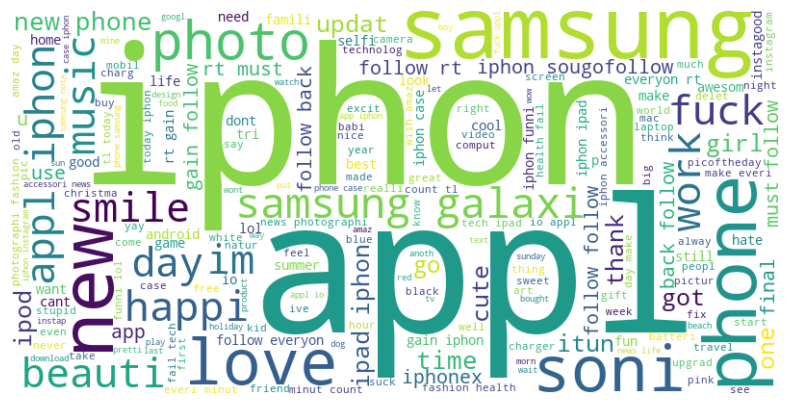

In [35]:
# Generate Word Cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the stemed text
all_stemed_text = ' '.join(data['tweet'].tolist()) # Concatenate all stemd text
generate_wordcloud(all_stemed_text)

In [36]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


## Building Vacubalary

In [61]:
from collections import Counter

In [62]:
# Define a function to convert the text to vacubalary with number of time the word
def vocb(text):
    vocab = Counter()
    for token in text:
        vocab.update(token.split()) # Split the text into tokens and update the vocabulary with all tokens        
    final_words=[key for key,count in vocab.items() if count>10] # # Filter words based on counts
    return final_words

text=vocb(data['tweet'])

In [63]:
len(text)

1146

In [64]:
#Save Vocabulary as a file
def save_vocab(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocab(text, '../static/model/vocabulary.txt')

Test Train split

In [69]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 568.7 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.1 MB 680.4 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.1 MB 680.4 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.1 MB 755.4 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/11.1 MB 834.1 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/11.1 MB 894.9 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/11.1 MB 916.7 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/11.1 MB 948.8 kB/s eta 0:00:10
   -------- ------

In [71]:
from sklearn.model_selection import train_test_split
X=data['tweet']
y=data['label']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [73]:
X_train.shape, X_test.shape

((6336,), (1584,))

Text Vectorization

In [91]:
#Using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer(min_df=1, vocabulary=text)

features=vec.fit_transform(X_train)
features_names=vec.get_feature_names_out()
df_X_train=pd.DataFrame(features.toarray(), columns=features_names)

df_X_train.head()


,test,android,app,beauti,cute,health,iger,iphoneonli,iphonesia,iphon,...,dessert,move,icecream,mp,led,rest,disney,develop,e,thursday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# function to vectorize the given text column
def vectorizer(dataset, vocabulary):
    vec_list=[]

    for line in dataset:
        line_lst=np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in line.split():
                line_lst[i]=1
        vec_list.append(line_lst)
    vec_list_new=np.asanyarray(vec_list, dtype=np.float32)

    return vec_list_new

In [114]:
#Vectorized the X_train dataset
vec_X_train=vectorizer(X_train, text)

In [116]:
vec_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [115]:
#Vectorized the X_test dataset
vec_X_test=vectorizer(X_test, text)

In [106]:
y_train.value_counts()

label
0    4709
1    1627
Name: count, dtype: int64

Imbalance label handling

In [99]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


<Axes: xlabel='label', ylabel='count'>

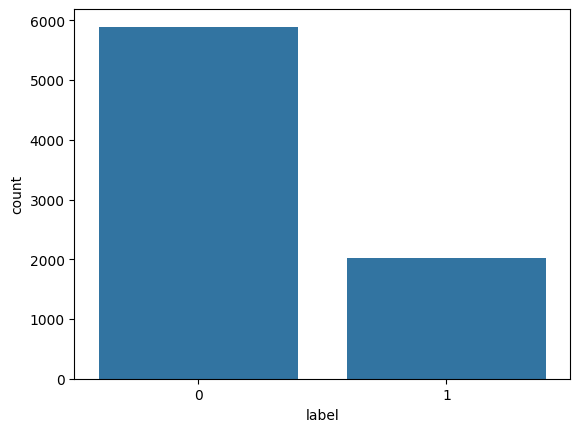

In [108]:
import seaborn as sns
sns.countplot(x='label', data=data)

In [109]:
!pip install imblearn

In [117]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

vec_X_train_smote,y_train_smote=smote.fit_resample(vec_X_train,y_train)

vec_X_train_smote.shape, y_train_smote.shape

((9418, 1146), (9418,))

In [118]:
y_train_smote.value_counts()

label
1    4709
0    4709
Name: count, dtype: int64

In [113]:
# Final datasets for training and testing
#Training
vec_X_train_smote
y_train_smote

#Testing
X_test
y_test

3850    0
2370    0
6808    1
1264    0
3782    0
       ..
6696    1
3542    0
434     1
1246    0
5860    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Metrics to evaluate the model.

In [128]:
# functions to validate accuracy_score, precision_score, recall_score, f1_score for training and test datasets

# Training Data Evaluation
def evaluate_predictions_training(y_actual_train, y_pred_train):
    
    train_accuracy = accuracy_score(y_actual_train, y_pred_train)
    train_precision = precision_score(y_actual_train, y_pred_train, average='weighted', zero_division=0)
    train_recall = recall_score(y_actual_train, y_pred_train, average='weighted', zero_division=0)
    train_f1 = f1_score(y_actual_train, y_pred_train, average='weighted', zero_division=0)

    print("\nTraining scores:")
    print(f"  Accuracy: {train_accuracy:.4f}")
    print(f"  Precision: {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-score: {train_f1:.4f}")

# Test Data Evaluation
def evaluate_predictions_test( y_actual_test, y_pred_test):
    
    test_accuracy = accuracy_score(y_actual_test, y_pred_test)
    test_precision = precision_score(y_actual_test, y_pred_test, average='weighted', zero_division=0)
    test_recall = recall_score(y_actual_test, y_pred_test, average='weighted', zero_division=0)
    test_f1 = f1_score(y_actual_test, y_pred_test, average='weighted', zero_division=0)

    print("\nTest scores:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-score: {test_f1:.4f}")


### Logistic Regression

In [127]:
lr=LogisticRegression()

# Fit the training data to the model
lr.fit(vec_X_train_smote, y_train_smote)

# predict the training set lables
y_train_pred=lr.predict(vec_X_train_smote)

# Evaluate training performance matrixs
evaluate_predictions_training(y_train_smote,y_train_pred)

# predict the test set lables
y_test_pred=lr.predict(vec_X_test)

# Evaluate test performance matrixs
evaluate_predictions_test(y_test,y_test_pred)


Training Data:
  Accuracy: 0.9413
  Precision: 0.9425
  Recall: 0.9413
  F1-score: 0.9412

Test Data:
  Accuracy: 0.8763
  Precision: 0.8882
  Recall: 0.8763
  F1-score: 0.8797


In [137]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(vec_X_train_smote, y_train_smote)

best_lr = grid_search.best_estimator_

y_train_pred = best_lr.predict(vec_X_train_smote)
evaluate_predictions_training(y_train_smote, y_train_pred)

y_test_pred = best_lr.predict(vec_X_test)
evaluate_predictions_test(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)


Training scores:
  Accuracy: 0.9413
  Precision: 0.9425
  Recall: 0.9413
  F1-score: 0.9412

Test scores:
  Accuracy: 0.8763
  Precision: 0.8882
  Recall: 0.8763
  F1-score: 0.8797
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### Muiltinomial Naive bayes

In [132]:
mnb=MultinomialNB()

# Fit the training data to the model
mnb.fit(vec_X_train_smote, y_train_smote)

# predict the training set lables
y_train_pred=mnb.predict(vec_X_train_smote)

# Evaluate training performance matrixs
evaluate_predictions_training(y_train_smote,y_train_pred)

# predict the test set lables
y_test_pred=mnb.predict(vec_X_test)

# Evaluate test performance matrixs
evaluate_predictions_test(y_test,y_test_pred)


Training scores:
  Accuracy: 0.9109
  Precision: 0.9152
  Recall: 0.9109
  F1-score: 0.9107

Test scores:
  Accuracy: 0.8699
  Precision: 0.8976
  Recall: 0.8699
  F1-score: 0.8758


In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

grid_search.fit(vec_X_train_smote, y_train_smote)

# Get the best model
best_mnb = grid_search.best_estimator_

# Predict and evaluate training data
y_train_pred = best_mnb.predict(vec_X_train_smote)
evaluate_predictions_training(y_train_smote, y_train_pred)

# Predict and evaluate test data
y_test_pred = best_mnb.predict(vec_X_test)
evaluate_predictions_test(y_test, y_test_pred)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

### DecisionTreeClassifier

In [133]:
dt=DecisionTreeClassifier()

# Fit the training data to the model
dt.fit(vec_X_train_smote, y_train_smote)

# predict the training set lables
y_train_pred=dt.predict(vec_X_train_smote)

# Evaluate training performance matrixs
evaluate_predictions_training(y_train_smote,y_train_pred)

# predict the test set lables
y_test_pred=dt.predict(vec_X_test)

# Evaluate test performance matrixs
evaluate_predictions_test(y_test,y_test_pred)


Training scores:
  Accuracy: 0.9997
  Precision: 0.9997
  Recall: 0.9997
  F1-score: 0.9997

Test scores:
  Accuracy: 0.8340
  Precision: 0.8323
  Recall: 0.8340
  F1-score: 0.8330


### Random Forest Classifier

In [134]:
rf=RandomForestClassifier()

# Fit the training data to the model
rf.fit(vec_X_train_smote, y_train_smote)

# predict the training set lables
y_train_pred=rf.predict(vec_X_train_smote)

# Evaluate training performance matrixs
evaluate_predictions_training(y_train_smote,y_train_pred)

# predict the test set lables
y_test_pred=rf.predict(vec_X_test)

# Evaluate test performance matrixs
evaluate_predictions_test(y_test,y_test_pred)


Training scores:
  Accuracy: 0.9997
  Precision: 0.9997
  Recall: 0.9997
  F1-score: 0.9997

Test scores:
  Accuracy: 0.8788
  Precision: 0.8777
  Recall: 0.8788
  F1-score: 0.8782


### Support Vector Classifyer

In [135]:
svc=SVC()

# Fit the training data to the model
svc.fit(vec_X_train_smote, y_train_smote)

# predict the training set lables
y_train_pred=svc.predict(vec_X_train_smote)

# Evaluate training performance matrixs
evaluate_predictions_training(y_train_smote,y_train_pred)

# predict the test set lables
y_test_pred=svc.predict(vec_X_test)

# Evaluate test performance matrixs
evaluate_predictions_test(y_test,y_test_pred)


Training scores:
  Accuracy: 0.9779
  Precision: 0.9786
  Recall: 0.9779
  F1-score: 0.9779

Test scores:
  Accuracy: 0.8870
  Precision: 0.8931
  Recall: 0.8870
  F1-score: 0.8891


In [139]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)